Nombre: Estadísticas criminales en la Republica Argentina.
Fuente: Ministerio de Seguridad de la Nación.
Descripción: Datos sobre delitos informados al Sistema nacional de Información Criminal.

Objetivo: 

Desarrollar un modelo de clasificación para predecir el tió de delito más probable en una provincia determinada, basándose en datos históricos.

Inciso A: Carga y Exploración de Datos

c:\Users\learr\OneDrive - uap.edu.ar\Ing. en sistemas\4. Cuarto año\Primer Cuatrimestre\Inteligencia Artificial\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Primero datossss
   provincia_id                 provincia_nombre  anio codigo_delito_snic_id                 codigo_delito_snic_nombre  cantidad_hechos  cantidad_victimas  cantidad_victimas_masc  cantidad_victimas_fem  cantidad_victimas_sd  tasa_hechos  tasa_victimas  tasa_victimas_masc  tasa_victimas_fem
0             2  Ciudad Autónoma de Buenos Aires  2000                     1                        Homicidios dolosos              149              158.0                   121.0                   37.0                   0.0     4.975001       5.275505            8.825701           2.278360
1             2  Ciudad Autónoma de Buenos Aires  2000                     2  Homicidios dolosos en grado de tentativa               54               58.0                    40.0                   18.0                   0.0     1.803021       1.936578            2.917587           1.108391
2             2  Ciudad Autónoma de Buenos Aires  2000                     3              Muertes en accidente

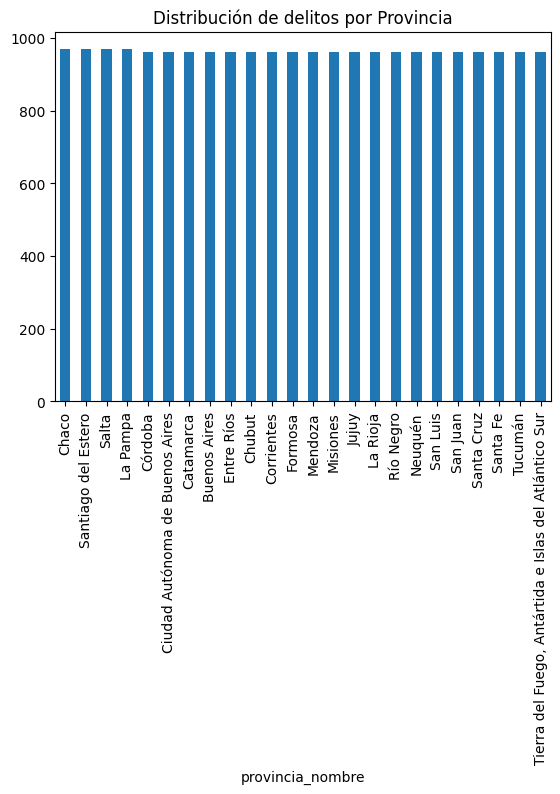

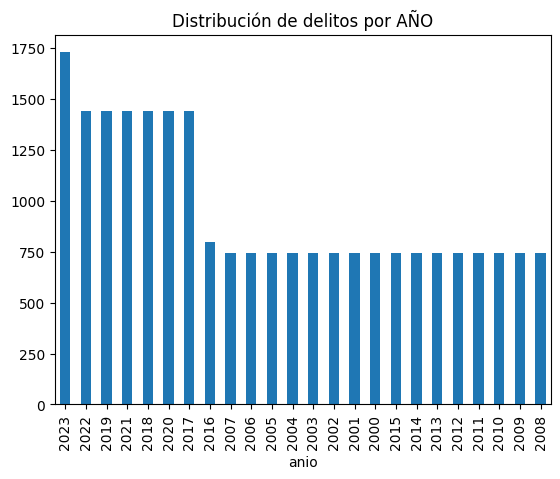

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 20.80it/s]

Reporte guardado en: Reportes\desbalance_criminales_1.html

Informe de análisis generado como 'desbalance_criminales.html'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from guardar import guardar_sin_sobrescribir
from sklearn.model_selection import train_test_split
# import dtypes

# Carga del Dataset - read_csv
df_criminal = pd.read_csv('../Datasets/snic-provincias.csv')
pd.set_option('display.max_columns', None)  # Ver todas las columnas
pd.set_option('display.width', 1000)        # Ancho más ampliox

# Visualizar primeros registros - .head()
print('Primero datossss')
print(df_criminal.head()) # Se ve muy feo con este
print('\n')

# Verificar tipos de datos, valores nulos y estadísticas descriptivas.
# print(df_criminal.dtypes()) #solo tipo de datos
df_criminal.info() # tipo + valores nulos
print('\n')
df_criminal.describe() #describir estadisticas básicas: valores nulos, media, desviación estándar, cuartiles

# Analizar la distribución de delitos por provincia y año.
df_criminal['provincia_nombre'].value_counts().plot(kind='bar')
plt.title('Distribución de delitos por Provincia')
plt.xticks(rotation=90)
plt.show()

df_criminal['anio'].value_counts().plot(kind='bar')
plt.title('Distribución de delitos por AÑO')
plt.xticks(rotation=90)
plt.show()

# Identificar posibles desbalances en las clases de delitos.
df_criminal['codigo_delito_snic_nombre'].value_counts(normalize=True)

# Generar un informe de análisis con YData Profiling para visualizar desbalances
profile_criminales = ProfileReport(df_criminal, title="Identificar desbalances en las clases de delitos")
guardar_sin_sobrescribir(profile_criminales, 'desbalance_criminales') #sin sobreescribir el archivo
print("\nInforme de análisis generado como 'desbalance_criminales.html'")



Inciso B: Preprocesamiento

In [9]:
from sklearn.model_selection import train_test_split

#Limpieza de datos
print(df_criminal.isnull().sum()) #valores nulos por columna

# Manejar valores nulos o inconsistentes.
df_clean = df_criminal.dropna() #eliminar filas con nulos

# O rellenar nulos con un valor (si tiene sentido)
# df_criminal['columna'] = df_criminal['columna'].fillna('Sin dato')

# Buscar duplicados
print('\n')
print(df_clean.duplicated().sum())

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()

# Filtrar datos irrelevantes si es necesario.
# Chequear inconsistencias en categorías
# print(df_clean['provincia_nombre'].unique())

# Ingeniería de Características:
# Codificar variables categóricas (por ejemplo, provincia, tipo de delito).
df_encoded = pd.get_dummies(df_clean, columns=['provincia_nombre'], drop_first=True) # para variables nominales

# Crear nuevas variables si se considera útil (por ejemplo, delitos por cada 100,000 habitantes).
df_encoded['hechos_altos'] = (df_encoded['cantidad_hechos'] > 100).astype(int)

# importante cambiar las variables categóricas a numéricas

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# División del Dataset:
# Separar los datos en conjuntos de entrenamiento y prueba.
# Primero dividimos en train+temp y test
train, temp = train_test_split(df_encoded, test_size=0.3, random_state=42)

# Ahora dividimos temp en validación y test (mitad y mitad de ese 30%)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# Verificar tamaños
print(f'Train: {train.shape}')
print(f'Valid: {valid.shape}')
print(f'Test:  {test.shape}')

provincia_id                     0
provincia_nombre                 0
anio                             0
codigo_delito_snic_id            0
codigo_delito_snic_nombre        0
cantidad_hechos                  0
cantidad_victimas            14432
cantidad_victimas_masc       14432
cantidad_victimas_fem        14432
cantidad_victimas_sd         14432
tasa_hechos                      0
tasa_victimas                14432
tasa_victimas_masc           14432
tasa_victimas_fem            14432
dtype: int64


0
Train: (6048, 37)
Valid: (1296, 37)
Test:  (1296, 37)


Inciso C - Modelado

Accuracy: 1.0
Confusion Matrix:
 [[649   0]
 [  0 647]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



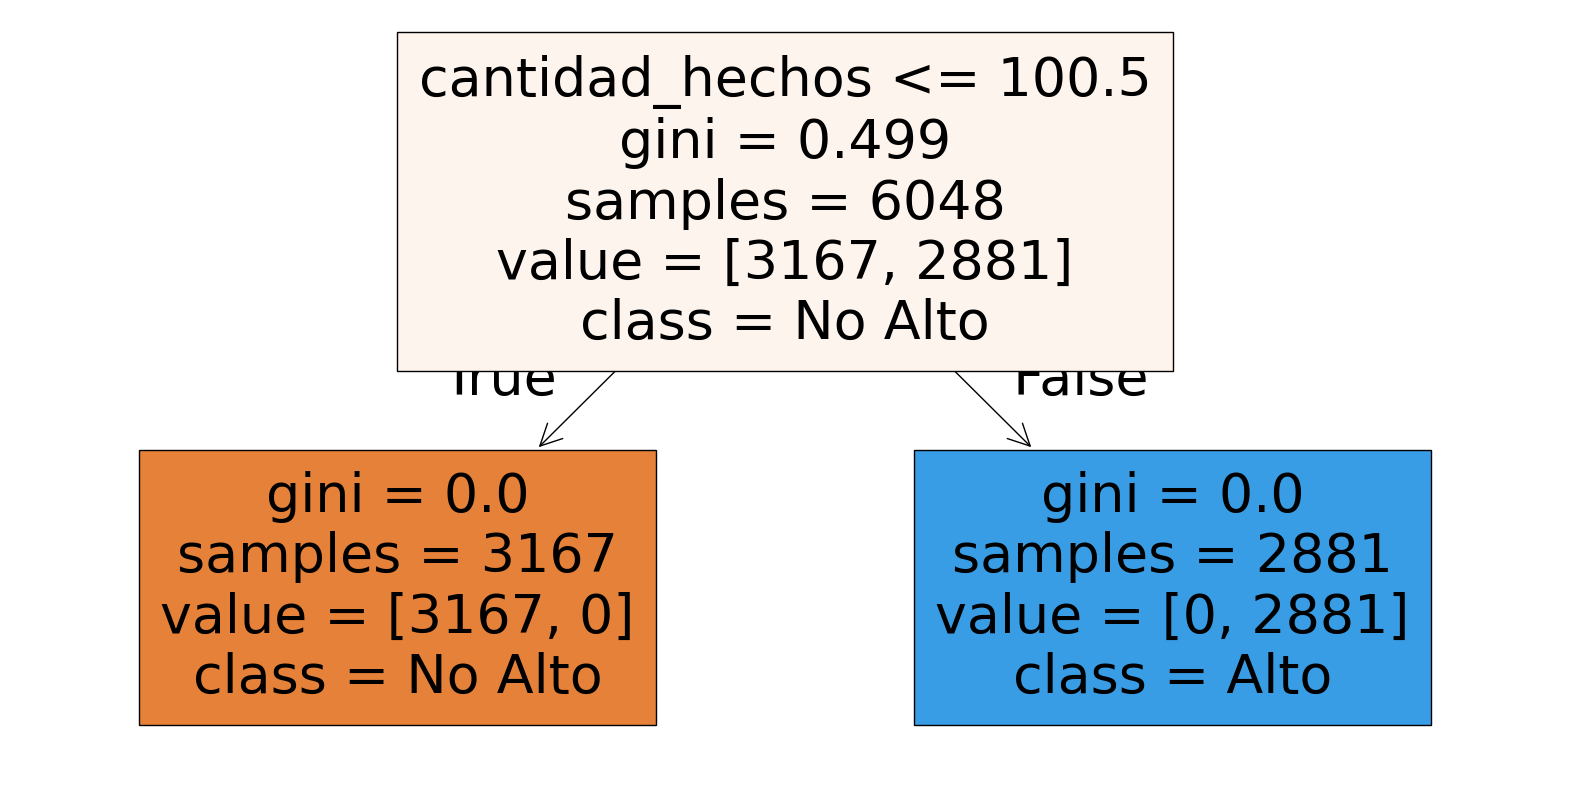

Random Forest - Accuracy: 1.0
Random Forest - Confusion Matrix:
 [[649   0]
 [  0 647]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

Árbol de Decisión - Accuracy: 1.00
Random Forest       - Accuracy: 1.00
El Árbol de Decisión tiene mejor rendimiento


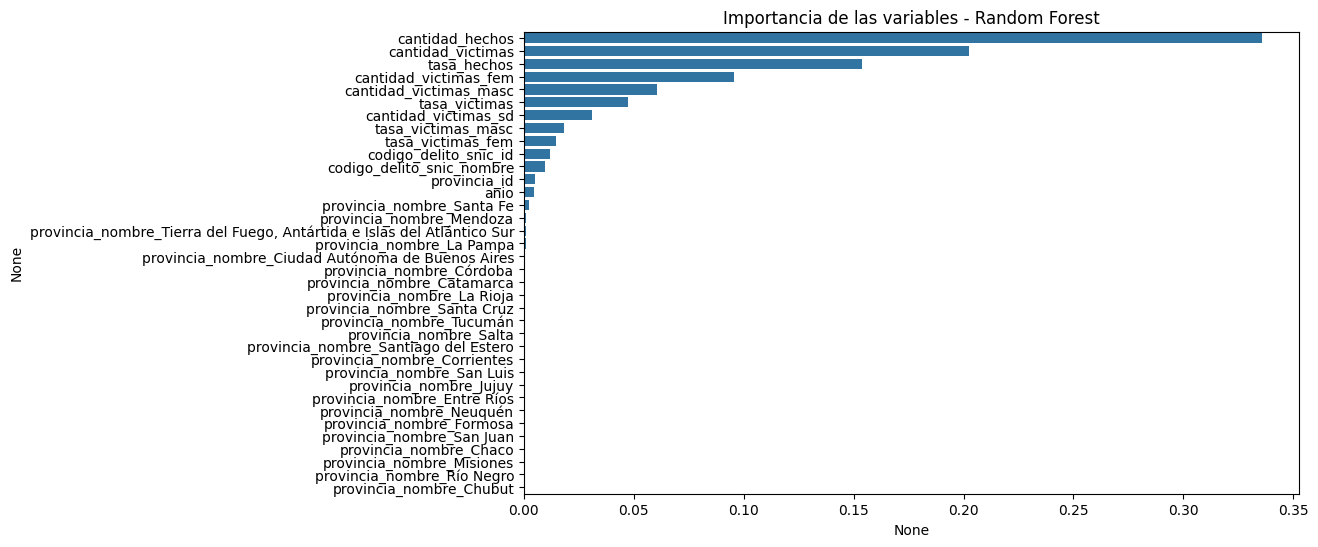

c:\Users\learr\OneDrive - uap.edu.ar\Ing. en sistemas\4. Cuarto año\Primer Cuatrimestre\Inteligencia Artificial\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.9992283950617284
XGBoost - Confusion Matrix:
 [[649   0]
 [  1 646]]
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

Árbol de Decisión - Accuracy: 1.00
Random Forest     - Accuracy: 1.00
XGBoost           - Accuracy: 1.00
Random Forest tiene el mejor desempeño


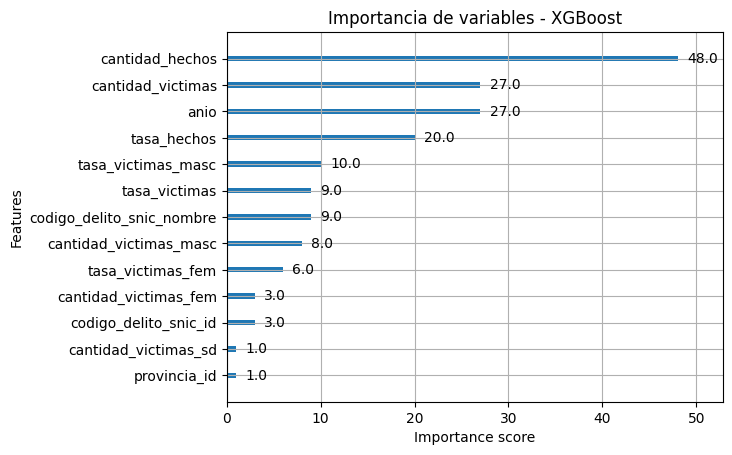

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Árbol de Decisión (DT):
# Entrenar un modelo de árbol de decisión.

# Ejemplo: separar features y target
X_train = train.drop('hechos_altos', axis=1)
y_train = train['hechos_altos']

X_valid = valid.drop('hechos_altos', axis=1)
y_valid = valid['hechos_altos']

# Crear y entrenar modelo
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

# Evaluar su desempeño en el conjunto de prueba.
# Predecir en validación
y_pred = arbol.predict(X_valid)

# Exactitud (accuracy)
print('Accuracy:', accuracy_score(y_valid, y_pred))

# Matriz de confusión
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))

# Reporte de clasificación (precision, recall, f1)
print('Classification Report:\n', classification_report(y_valid, y_pred))


plt.figure(figsize=(20,10))
tree.plot_tree(arbol, filled=True, feature_names=X_train.columns, class_names=['No Alto', 'Alto'])
plt.show()

# Random Forest (RF):
# Entrenar un modelo de bosque aleatorio.
# Crear y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_valid)

# Accuracy
print('Random Forest - Accuracy:', accuracy_score(y_valid, y_pred_rf))

# Matriz de confusión
print('Random Forest - Confusion Matrix:\n', confusion_matrix(y_valid, y_pred_rf))

# Reporte de clasificación
print('Random Forest - Classification Report:\n', classification_report(y_valid, y_pred_rf))

# Comparar su desempeño con el modelo de árbol de decisión.
# Accuracies
acc_arbol = accuracy_score(y_valid, y_pred)
acc_rf = accuracy_score(y_valid, y_pred_rf)

print(f'Árbol de Decisión - Accuracy: {acc_arbol:.2f}')
print(f'Random Forest       - Accuracy: {acc_rf:.2f}')

if acc_rf > acc_arbol:
    print("El Random Forest tiene mejor rendimiento")
else:
    print("El Árbol de Decisión tiene mejor rendimiento")

# Extra, featuyre importante de RF
import seaborn as sns

importancias = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importancias, y=importancias.index)
plt.title('Importancia de las variables - Random Forest')
plt.show()

# XGBoost:
# Entrenar un modelo utilizando XGBoost.
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predecir en validación
y_pred_xgb = xgb.predict(X_valid)

# Accuracy
print('XGBoost - Accuracy:', accuracy_score(y_valid, y_pred_xgb))

# Matriz de confusión
print('XGBoost - Confusion Matrix:\n', confusion_matrix(y_valid, y_pred_xgb))

# Reporte de clasificación
print('XGBoost - Classification Report:\n', classification_report(y_valid, y_pred_xgb))

# Evaluar y comparar su desempeño con los modelos anteriores.
# Accuracies
acc_arbol = accuracy_score(y_valid, y_pred)
acc_rf    = accuracy_score(y_valid, y_pred_rf)
acc_xgb   = accuracy_score(y_valid, y_pred_xgb)

print(f'Árbol de Decisión - Accuracy: {acc_arbol:.2f}')
print(f'Random Forest     - Accuracy: {acc_rf:.2f}')
print(f'XGBoost           - Accuracy: {acc_xgb:.2f}')

# Mejor desempeño
mejor = max(acc_arbol, acc_rf, acc_xgb)
if mejor == acc_xgb:
    print("XGBoost tiene el mejor desempeño")
elif mejor == acc_rf:
    print("Random Forest tiene el mejor desempeño")
else:
    print("El Árbol de Decisión fue el mejor")

#importancia de variables
import xgboost as xgbplt

xgbplt.plot_importance(xgb)
plt.title('Importancia de variables - XGBoost')
plt.show()

Inciso D - Evaluación y Visualización

📊 Árbol de Decisión
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

--------------------------------------------------
📊 Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       649
           1       1.00      1.00      1.00       647

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

--------------------------------------------------
📊 XGBoost
Accuracy: 0.9992283950617284
Precision: 

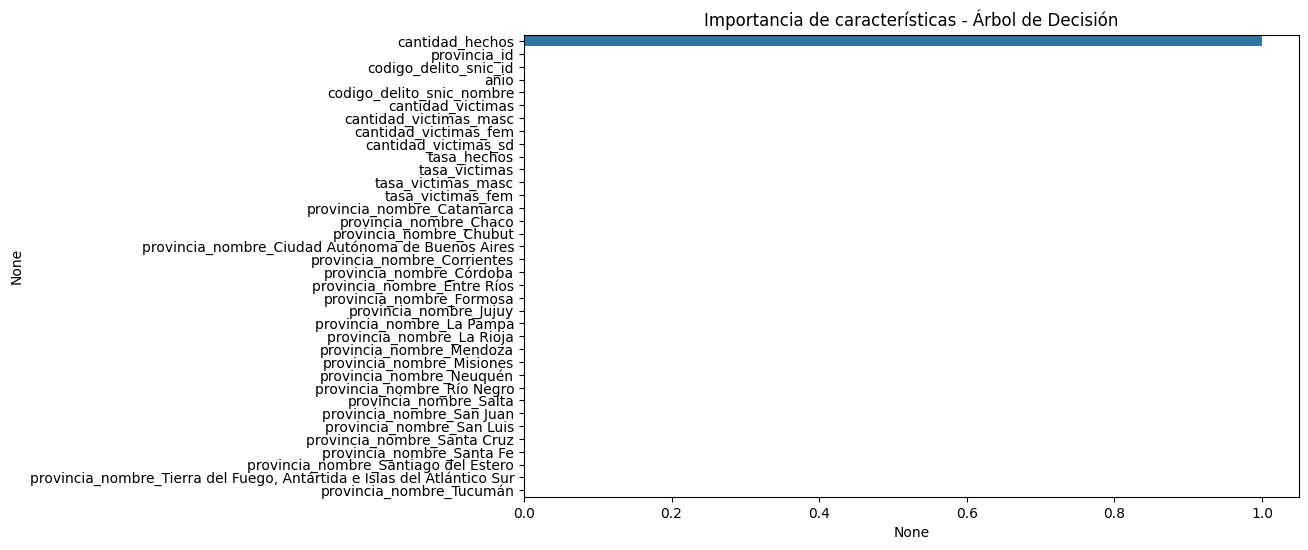

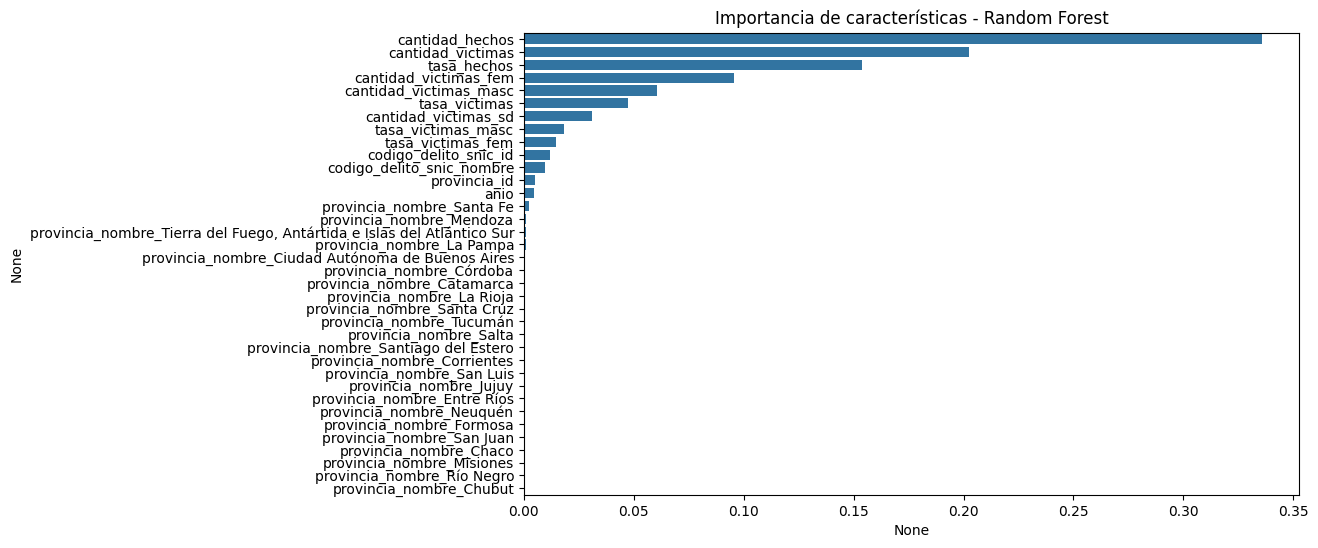

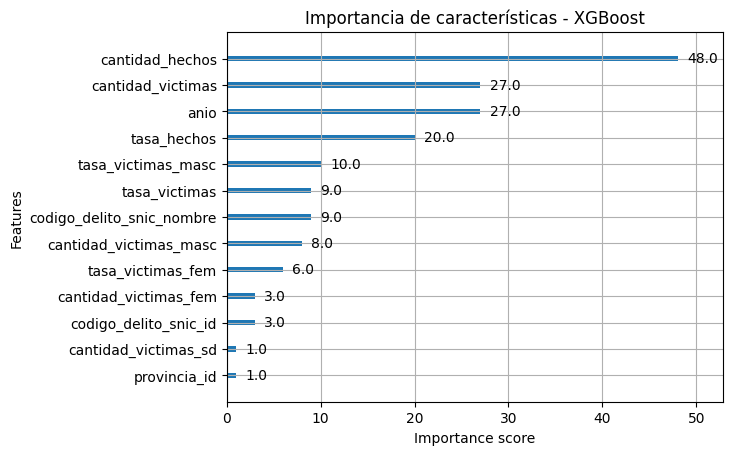

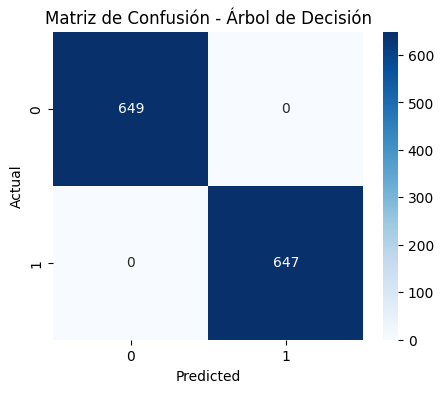

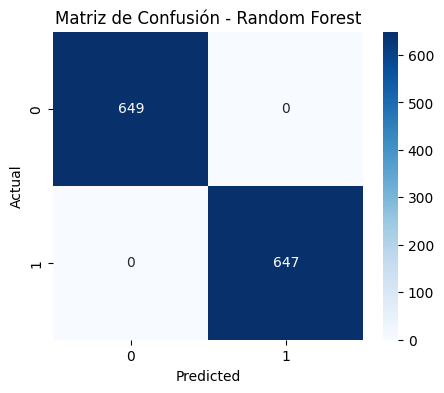

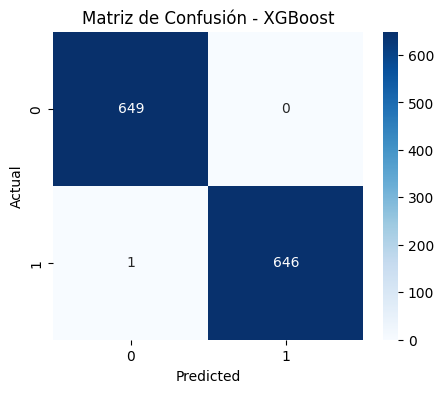

In [13]:
# Métricas de Evaluación:
# Calcular precisión, recall, F1-score y matriz de confusión para cada modelo.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(nombre, y_valid, y_pred):
    print(f'📊 {nombre}')
    print('Accuracy:', accuracy_score(y_valid, y_pred))
    print('Precision:', precision_score(y_valid, y_pred, average='weighted'))
    print('Recall:', recall_score(y_valid, y_pred, average='weighted'))
    print('F1-Score:', f1_score(y_valid, y_pred, average='weighted'))
    print('Classification Report:\n', classification_report(y_valid, y_pred))
    print('-' * 50)

evaluar_modelo('Árbol de Decisión', y_valid, y_pred)
evaluar_modelo('Random Forest', y_valid, y_pred_rf)
evaluar_modelo('XGBoost', y_valid, y_pred_xgb)

# Visualización:
# Graficar la importancia de las características en cada modelo.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Árbol de Decisión
importancias_arbol = pd.Series(arbol.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importancias_arbol, y=importancias_arbol.index)
plt.title('Importancia de características - Árbol de Decisión')
plt.show()

# Random Forest
importancias_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importancias_rf, y=importancias_rf.index)
plt.title('Importancia de características - Random Forest')
plt.show()

import xgboost as xgbplt

xgbplt.plot_importance(xgb)
plt.title('Importancia de características - XGBoost')
plt.show()


# Visualizar la matriz de confusión utilizando mapas de calor.
def plot_confusion(nombre, y_valid, y_pred):
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion('Árbol de Decisión', y_valid, y_pred)
plot_confusion('Random Forest', y_valid, y_pred_rf)
plot_confusion('XGBoost', y_valid, y_pred_xgb)


# Exportación: ya lo hice :)
# Guardar los gráficos en archivos HTML interactivos si se utiliza Plotly.

Inciso E - Conclusiones

Comparación de Modelos:

Analizar cuál modelo tuvo mejor desempeño y por qué.

Interpretación:

Discutir la importancia de las variables más influyentes.

Reflexionar sobre posibles aplicaciones prácticas de los modelos desarrollados.